

```

```

# Power Outage

**Name(s)**: Claudine Maura Handali, Sharon Tey

**Website Link**: (your website link)

In [10]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

Null Hypothesis:
The average outage duration for vandalism-related events is equal to the average outage duration for all other causes.

Alternative Hypothesis:
The average outage duration for vandalism-related events differs from the average for all other causes.

Test Statistic:
The test statistic is the difference between the average outage duration for outages caused by vandalism and the average outage duration for outages caused by all other factors.

## Step 2: Data Cleaning and Exploratory Data Analysis

# Data Cleaning

In [11]:
#excel_file = Path('outage.xlsx')
#df = pd.read_excel(excel_file, header=5)
#df.head()


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [12]:
excel_file = Path('outage.csv')
df = pd.read_csv(excel_file, header=5)
df.head()

,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
2,NaN,2.0,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
3,NaN,3.0,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
4,NaN,4.0,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


In [13]:
df = df.drop(columns=['variables','OBS']).drop(index=0)
keep_cols = [
    "YEAR",
    "MONTH",
    "U.S._STATE",
    "NERC.REGION",
    "CLIMATE.REGION",
    "ANOMALY.LEVEL",
    "OUTAGE.START.DATE",
    "OUTAGE.START.TIME",
    "OUTAGE.RESTORATION.DATE",
    "OUTAGE.RESTORATION.TIME",
    "CAUSE.CATEGORY",
    "OUTAGE.DURATION",
    "DEMAND.LOSS.MW",
    "CUSTOMERS.AFFECTED",
    "TOTAL.PRICE",
    "TOTAL.SALES",
    "TOTAL.CUSTOMERS",
    "POPPCT_URBAN",
    "POPDEN_URBAN",
    "AREAPCT_URBAN",
    "CAUSE.CATEGORY.DETAIL",
    "CLIMATE.CATEGORY",
]

df = df[keep_cols]
df.head()

,YEAR,MONTH,U.S._STATE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,...,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,TOTAL.PRICE,TOTAL.SALES,TOTAL.CUSTOMERS,POPPCT_URBAN,POPDEN_URBAN,AREAPCT_URBAN,CAUSE.CATEGORY.DETAIL,CLIMATE.CATEGORY
1,2011.0,7.0,Minnesota,MRO,East North Central,-0.3,"Friday, July 01, 2011",5:00:00 PM,"Sunday, July 03, 2011",8:00:00 PM,...,NaN,70000.0,9.28,6562520.0,2595696.0,73.27,2279.0,2.14,NaN,normal
2,2014.0,5.0,Minnesota,MRO,East North Central,-0.1,"Sunday, May 11, 2014",6:38:00 PM,"Sunday, May 11, 2014",6:39:00 PM,...,NaN,NaN,9.28,5284231.0,2640737.0,73.27,2279.0,2.14,vandalism,normal
3,2010.0,10.0,Minnesota,MRO,East North Central,-1.5,"Tuesday, October 26, 2010",8:00:00 PM,"Thursday, October 28, 2010",10:00:00 PM,...,NaN,70000.0,8.15,5222116.0,2586905.0,73.27,2279.0,2.14,heavy wind,cold
4,2012.0,6.0,Minnesota,MRO,East North Central,-0.1,"Tuesday, June 19, 2012",4:30:00 AM,"Wednesday, June 20, 2012",11:00:00 PM,...,NaN,68200.0,9.19,5787064.0,2606813.0,73.27,2279.0,2.14,thunderstorm,normal
5,2015.0,7.0,Minnesota,MRO,East North Central,1.2,"Saturday, July 18, 2015",2:00:00 AM,"Sunday, July 19, 2015",7:00:00 AM,...,250.0,250000.0,10.43,5970339.0,2673531.0,73.27,2279.0,2.14,NaN,warm


In [14]:
# Parse the DATE columns to datetime (if not already)
df['OUTAGE.START.DATE']       = pd.to_datetime(df['OUTAGE.START.DATE'])
df['OUTAGE.RESTORATION.DATE'] = pd.to_datetime(df['OUTAGE.RESTORATION.DATE'])

# Convert the time columns to strings before parsing to timedeltas
df['OUTAGE.START.TIME'] = df['OUTAGE.START.TIME'].astype(str)
df['OUTAGE.RESTORATION.TIME'] = df['OUTAGE.RESTORATION.TIME'].astype(str)

# Parse the TIME columns to timedeltas
df['OUTAGE.START.TIME']       = pd.to_timedelta(df['OUTAGE.START.TIME'])
df['OUTAGE.RESTORATION.TIME'] = pd.to_timedelta(df['OUTAGE.RESTORATION.TIME'])

# Combine into single Timestamp columns
df['OUTAGE.START'] = df['OUTAGE.START.DATE'] + df['OUTAGE.START.TIME']
df['OUTAGE.RESTORATION'] = df['OUTAGE.RESTORATION.DATE'] + df['OUTAGE.RESTORATION.TIME']

# Drop the old columns
df = df.drop(columns=[
    'OUTAGE.START.DATE', 'OUTAGE.START.TIME',
    'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'
])

df.head()

,YEAR,MONTH,U.S._STATE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,TOTAL.PRICE,TOTAL.SALES,TOTAL.CUSTOMERS,POPPCT_URBAN,POPDEN_URBAN,AREAPCT_URBAN,CAUSE.CATEGORY.DETAIL,CLIMATE.CATEGORY,OUTAGE.START,OUTAGE.RESTORATION
1,2011.0,7.0,Minnesota,MRO,East North Central,-0.3,severe weather,3060.0,NaN,70000.0,9.28,6562520.0,2595696.0,73.27,2279.0,2.14,NaN,normal,2011-07-01 05:00:00,2011-07-03 08:00:00
2,2014.0,5.0,Minnesota,MRO,East North Central,-0.1,intentional attack,1.0,NaN,NaN,9.28,5284231.0,2640737.0,73.27,2279.0,2.14,vandalism,normal,2014-05-11 06:38:00,2014-05-11 06:39:00
3,2010.0,10.0,Minnesota,MRO,East North Central,-1.5,severe weather,3000.0,NaN,70000.0,8.15,5222116.0,2586905.0,73.27,2279.0,2.14,heavy wind,cold,2010-10-26 08:00:00,2010-10-28 10:00:00
4,2012.0,6.0,Minnesota,MRO,East North Central,-0.1,severe weather,2550.0,NaN,68200.0,9.19,5787064.0,2606813.0,73.27,2279.0,2.14,thunderstorm,normal,2012-06-19 04:30:00,2012-06-20 11:00:00
5,2015.0,7.0,Minnesota,MRO,East North Central,1.2,severe weather,1740.0,250.0,250000.0,10.43,5970339.0,2673531.0,73.27,2279.0,2.14,NaN,warm,2015-07-18 02:00:00,2015-07-19 07:00:00


In [15]:




# 1) Replace zeros with NaN in OUTAGE.DURATION, CUSTOMERS.AFFECTED, DEMAND.LOSS.MW
zero_cols = ["OUTAGE.DURATION", "CUSTOMERS.AFFECTED", "DEMAND.LOSS.MW"]
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# 2) Combine POPPCT_URBAN, POPDEN_URBAN, AREAPCT_URBAN into a single “URBAN” index
#    Approach: z‐score each column, then take the row‐wise average of those z‐scores.

urban_feats = ["POPPCT_URBAN", "POPDEN_URBAN", "AREAPCT_URBAN"]

# a) Drop rows where any urban feature is missing, just for the purpose of scaling
#    (alternatively, you could impute first if you expect missing values here)
df_urb = df[urban_feats].dropna()

# b) Fit a StandardScaler on those columns
scaler = StandardScaler()
scaled_vals = scaler.fit_transform(df_urb)

# c) Create a DataFrame of the scaled values, aligned by index
scaled_df = pd.DataFrame(scaled_vals, index=df_urb.index, columns=[f"{c}_z" for c in urban_feats])

# d) Merge the scaled z‐scores back into the original DataFrame
df = df.merge(scaled_df, how="left", left_index=True, right_index=True)

# e) Compute URBAN as the mean of the three z‐scores (row‐wise)
df["URBAN"] = df[[f"{c}_z" for c in urban_feats]].mean(axis=1)

# f) (Optional) Drop the intermediate z‐score columns if you don’t need them
df.drop(columns=[f"{c}_z" for c in urban_feats], inplace=True)

# Now `df` has:
# - zeros in the specified columns replaced by NaN
# - a new column “URBAN” that combines percent‐urban, density, and urban‐area percentage


In [16]:
# find all rows with vandalism

vandalism_rows = df[df['CAUSE.CATEGORY.DETAIL'] == 'vandalism']
vandalism_rows

,YEAR,MONTH,U.S._STATE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,...,TOTAL.SALES,TOTAL.CUSTOMERS,POPPCT_URBAN,POPDEN_URBAN,AREAPCT_URBAN,CAUSE.CATEGORY.DETAIL,CLIMATE.CATEGORY,OUTAGE.START,OUTAGE.RESTORATION,URBAN
2,2014.0,5.0,Minnesota,MRO,East North Central,-0.1,intentional attack,1.0,NaN,NaN,...,5284231.0,2640737.0,73.27,2279.0,2.14,vandalism,normal,2014-05-11 06:38:00,2014-05-11 06:39:00,-0.506277
13,2011.0,7.0,Minnesota,MRO,East North Central,-0.3,intentional attack,NaN,NaN,NaN,...,6562520.0,2595696.0,73.27,2279.0,2.14,vandalism,normal,2011-07-08 10:00:00,2011-07-08 10:00:00,-0.506277
14,2011.0,5.0,Minnesota,MRO,East North Central,-0.4,intentional attack,1322.0,NaN,NaN,...,5262668.0,2595696.0,73.27,2279.0,2.14,vandalism,normal,2011-05-11 03:55:00,2011-05-12 01:57:00,-0.506277
17,2012.0,8.0,Tennessee,SERC,Central,0.3,intentional attack,NaN,NaN,NaN,...,9791474.0,3189570.0,66.39,1450.3,7.05,vandalism,normal,2012-08-13 01:15:00,2012-08-13 01:15:00,-0.807121
23,2015.0,7.0,Tennessee,SERC,Central,1.2,intentional attack,NaN,NaN,NaN,...,9499547.0,3260708.0,66.39,1450.3,7.05,vandalism,warm,2015-07-30 01:00:00,NaT,-0.807121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2015.0,12.0,Kansas,SPP,South,2.3,intentional attack,90.0,NaN,NaN,...,3092395.0,1484396.0,74.20,2176.5,1.19,vandalism,warm,2015-12-05 09:00:00,2015-12-05 10:30:00,-0.540220
1522,2011.0,12.0,Idaho,WECC,Northwest,-0.9,intentional attack,NaN,NaN,NaN,...,2031531.0,794925.0,70.58,2216.8,0.60,vandalism,cold,2011-12-21 10:30:00,2011-12-21 10:30:00,-0.646916
1524,2011.0,1.0,Idaho,WECC,Northwest,-1.3,intentional attack,360.0,NaN,NaN,...,2063171.0,794925.0,70.58,2216.8,0.60,vandalism,cold,2011-01-23 07:00:00,2011-01-23 01:00:00,-0.646916
1526,2011.0,6.0,Idaho,WECC,Northwest,-0.3,intentional attack,870.0,NaN,NaN,...,1886871.0,794925.0,70.58,2216.8,0.60,vandalism,normal,2011-06-15 04:00:00,2011-06-16 06:30:00,-0.646916


In [17]:
df.isnull().sum()

,0
YEAR,0
MONTH,9
U.S._STATE,0
NERC.REGION,0
CLIMATE.REGION,6
ANOMALY.LEVEL,9
CAUSE.CATEGORY,0
OUTAGE.DURATION,136
DEMAND.LOSS.MW,901
CUSTOMERS.AFFECTED,655


#Univariate Analysis

In [18]:
fig1 = px.histogram(
    df,
    x="OUTAGE.DURATION",
    nbins=40,
    title="Histogram of Outage Durations",
    labels={"OUTAGE.DURATION": "Duration (minutes)"}
)
fig1.show()


In [19]:
fig2 = px.box(
    df,
    y="CUSTOMERS.AFFECTED",
    points="all",
    title="Boxplot of Customers Affected per Outage",
    labels={"CUSTOMERS.AFFECTED": "Number of Customers"}
)
fig2.update_layout(yaxis_type="log")
fig2.show()


#Bivariate Analysis

In [ ]:
# Aggregate the dataframe by CAUSE.CATEGORY and calculate the mean duration
cause_duration = df.groupby('CAUSE.CATEGORY')['OUTAGE.DURATION'].mean().reset_index()

# Create a bar chart using plotly express
fig = px.bar(
    cause_duration,
    x='CAUSE.CATEGORY',
    y='OUTAGE.DURATION',
    title='Average Outage Duration per Cause Category',
    labels={'OUTAGE.DURATION': 'Average Duration (minutes)', 'CAUSE.CATEGORY': 'Cause Category'}
)

# Display the plot
fig.show()

In [ ]:
# Dot plot for U.S._STATE vs Outage Duration
fig = px.scatter(df,
                 x="OUTAGE.DURATION",
                 y="U.S._STATE",
                 title="Outage Duration vs U.S. State",
                 labels={"OUTAGE.DURATION": "Duration (minutes)", "U.S._STATE": "U.S. State"})

fig.show()

In [ ]:
# Outage Duration over Years
outage_duration_by_year = df.groupby('YEAR')['OUTAGE.DURATION'].mean().reset_index()

fig = px.line(outage_duration_by_year,
              x='YEAR',
              y='OUTAGE.DURATION',
              title='Average Outage Duration Over Years',
              labels={'OUTAGE.DURATION': 'Average Duration (minutes)', 'YEAR': 'Year'})

fig.show()

In [ ]:
fig4 = px.box(
    df,
    x="CLIMATE.REGION",
    y="OUTAGE.DURATION",
    points="all",
    title="Outage Duration Across Climate Regions",
    labels={
        "CLIMATE.REGION": "Climate Region",
        "OUTAGE.DURATION": "Duration (minutes)"
    }
)
fig4.update_layout(xaxis_tickangle=-45)
fig4.show()


#Interesting Aggregates

In [ ]:
# In your notebook:
pivot = (
    df
    .groupby("CLIMATE.CATEGORY")["OUTAGE.DURATION"]
    .agg(["count", "mean", "median"])
    .reset_index()
    .rename(columns={
        "count": "NumEvents",
        "mean": "AvgDuration",
        "median": "MedianDuration"
    })
)
pivot


,CLIMATE.CATEGORY,NumEvents,AvgDuration,MedianDuration
0,cold,463,2656.956803,816.0
1,normal,730,2530.980822,563.0
2,warm,283,2817.318021,881.0


## Step 3: Assessment of Missingness

Observed TVD (Cause.Category): 0.4688
Permutation p-value (Cause.Category): 0.0000


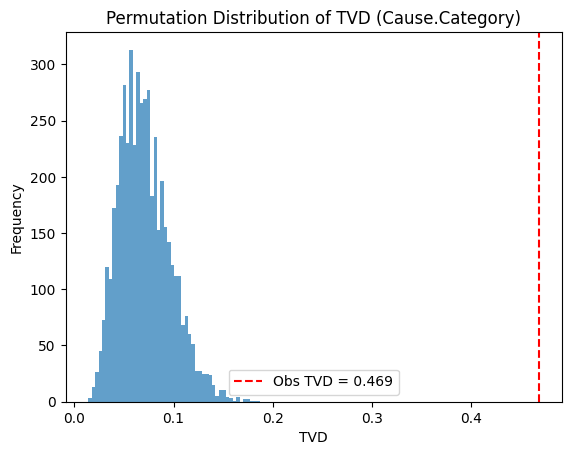

Observed TVD (MONTH): 0.1435
Permutation p-value (MONTH): 0.1928


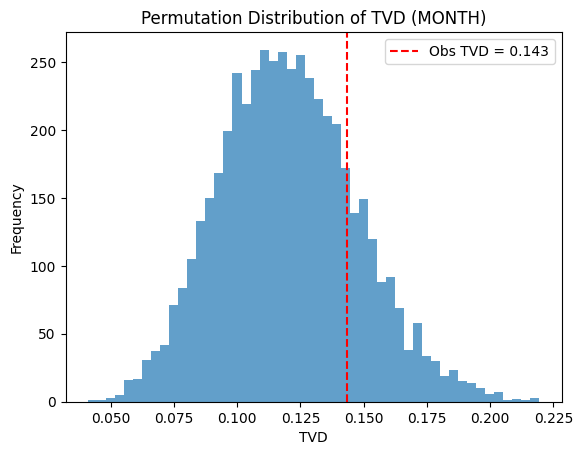

In [20]:


# 1. Create a missingness indicator for OUTAGE.DURATION
df['miss_dur'] = df['OUTAGE.DURATION'].isna().astype(int)

# ----------------------------------------------------
# Test dependency on CAUSE.CATEGORY
# ----------------------------------------------------

# 2a. Keep only rows where CAUSE.CATEGORY is not NaN
df_cause = df.dropna(subset=['CAUSE.CATEGORY']).copy()

# 2b. Compute observed distributions of CAUSE.CATEGORY when duration is missing vs. not missing
dist_miss = df_cause[df_cause['miss_dur'] == 1]['CAUSE.CATEGORY'].value_counts(normalize=True)
dist_not  = df_cause[df_cause['miss_dur'] == 0]['CAUSE.CATEGORY'].value_counts(normalize=True)

# 2c. Align the two distributions on the same set of categories
all_categories = dist_miss.index.union(dist_not.index)
p_miss = dist_miss.reindex(all_categories, fill_value=0)
p_not  = dist_not.reindex(all_categories, fill_value=0)

# 2d. Compute observed Total Variation Distance (TVD)
obs_tvd_cause = 0.5 * np.sum(np.abs(p_miss - p_not))
print(f"Observed TVD (Cause.Category): {obs_tvd_cause:.4f}")

# 2e. Permutation test to build null distribution of TVD
n_perms = 5000
perm_tvd_cause = np.zeros(n_perms)
all_miss_vals = df_cause['miss_dur'].values
cause_vals    = df_cause['CAUSE.CATEGORY'].values

for i in range(n_perms):
    permuted_miss = np.random.permutation(all_miss_vals)
    tmp = pd.DataFrame({
        'CAUSE': cause_vals,
        'miss' : permuted_miss
    })
    perm_dist_miss = tmp[tmp['miss'] == 1]['CAUSE'].value_counts(normalize=True).reindex(all_categories, fill_value=0)
    perm_dist_not  = tmp[tmp['miss'] == 0]['CAUSE'].value_counts(normalize=True).reindex(all_categories, fill_value=0)
    perm_tvd_cause[i] = 0.5 * np.sum(np.abs(perm_dist_miss - perm_dist_not))

# 2f. Compute p-value for CAUSE.CATEGORY test
p_value_cause = np.mean(perm_tvd_cause >= obs_tvd_cause)
print(f"Permutation p-value (Cause.Category): {p_value_cause:.4f}")

# 2g. Plot the null distribution of TVD for CAUSE.CATEGORY
plt.hist(perm_tvd_cause, bins=50, alpha=0.7)
plt.axvline(obs_tvd_cause, color='red', linestyle='--', label=f'Obs TVD = {obs_tvd_cause:.3f}')
plt.xlabel('TVD')
plt.ylabel('Frequency')
plt.title('Permutation Distribution of TVD (Cause.Category)')
plt.legend()
plt.show()


# ----------------------------------------------------
# Test dependency on MONTH
# ----------------------------------------------------

# 3a. Keep only rows where MONTH is not NaN
df_month = df.dropna(subset=['MONTH']).copy()

# 3b. Compute observed distributions of MONTH when duration is missing vs. not missing
dist_miss_m = df_month[df_month['miss_dur'] == 1]['MONTH'].value_counts(normalize=True)
dist_not_m  = df_month[df_month['miss_dur'] == 0]['MONTH'].value_counts(normalize=True)

# 3c. Align distributions on the full set of months (1–12)
all_months = np.arange(1, 13)
p_miss_m = dist_miss_m.reindex(all_months, fill_value=0)
p_not_m  = dist_not_m.reindex(all_months, fill_value=0)

# 3d. Compute observed TVD for MONTH
obs_tvd_month = 0.5 * np.sum(np.abs(p_miss_m - p_not_m))
print(f"Observed TVD (MONTH): {obs_tvd_month:.4f}")

# 3e. Permutation test to build null distribution of TVD for MONTH
perm_tvd_month = np.zeros(n_perms)
all_miss_vals_m = df_month['miss_dur'].values
month_vals      = df_month['MONTH'].values

for i in range(n_perms):
    permuted_miss_m = np.random.permutation(all_miss_vals_m)
    tmp_m = pd.DataFrame({
        'MONTH': month_vals,
        'miss' : permuted_miss_m
    })
    perm_dist_miss_m = tmp_m[tmp_m['miss'] == 1]['MONTH'].value_counts(normalize=True).reindex(all_months, fill_value=0)
    perm_dist_not_m  = tmp_m[tmp_m['miss'] == 0]['MONTH'].value_counts(normalize=True).reindex(all_months, fill_value=0)
    perm_tvd_month[i] = 0.5 * np.sum(np.abs(perm_dist_miss_m - perm_dist_not_m))

# 3f. Compute p-value for MONTH test
p_value_month = np.mean(perm_tvd_month >= obs_tvd_month)
print(f"Permutation p-value (MONTH): {p_value_month:.4f}")

# 3g. Plot the null distribution for MONTH
plt.hist(perm_tvd_month, bins=50, alpha=0.7)
plt.axvline(obs_tvd_month, color='red', linestyle='--', label=f'Obs TVD = {obs_tvd_month:.3f}')
plt.xlabel('TVD')
plt.ylabel('Frequency')
plt.title('Permutation Distribution of TVD (MONTH)')
plt.legend()
plt.show()


Observed TVD (Cause→miss_cust): 0.7558
Permutation p-value (Cause→miss_cust): 0.0000


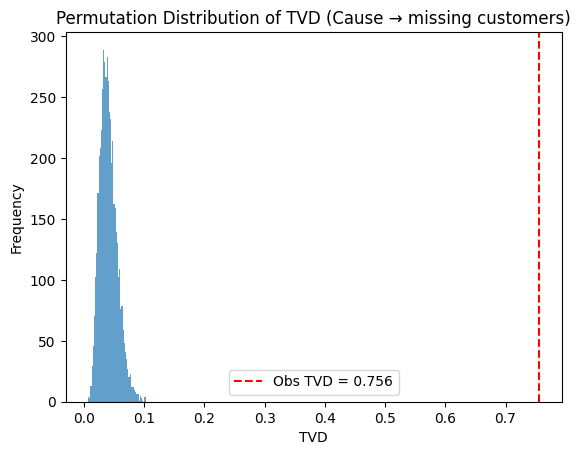

Observed mean difference (Duration→miss_cust): -1243.5324
Permutation p-value (Duration→miss_cust): 0.0000


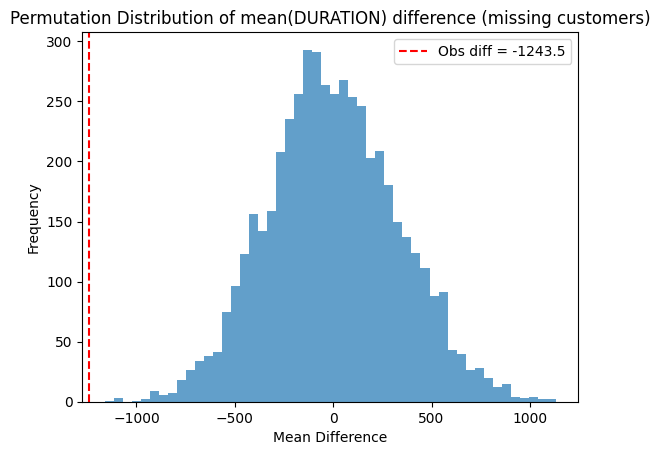

In [21]:

# 1) Create missingness indicator for CUSTOMERS.AFFECTED
df['miss_cust'] = df['CUSTOMERS.AFFECTED'].isna().astype(int)

# ----------------------------------------------------
# Test dependency on CAUSE.CATEGORY (categorical)
# ----------------------------------------------------

# 2a. Subset to rows where CAUSE.CATEGORY is not NaN
df_cause2 = df.dropna(subset=['CAUSE.CATEGORY']).copy()

# 2b. Compute observed distributions: Cause when CUSTOMERS is missing vs. not
dist_miss_cc = df_cause2[df_cause2['miss_cust'] == 1]['CAUSE.CATEGORY'].value_counts(normalize=True)
dist_not_cc  = df_cause2[df_cause2['miss_cust'] == 0]['CAUSE.CATEGORY'].value_counts(normalize=True)

# 2c. Align categories
all_categories_cc = dist_miss_cc.index.union(dist_not_cc.index)
p_miss_cc = dist_miss_cc.reindex(all_categories_cc, fill_value=0)
p_not_cc  = dist_not_cc.reindex(all_categories_cc, fill_value=0)

# 2d. Observed TVD
obs_tvd_cc = 0.5 * np.sum(np.abs(p_miss_cc - p_not_cc))
print(f"Observed TVD (Cause→miss_cust): {obs_tvd_cc:.4f}")

# 2e. Permutation null distribution
n_perms = 5000
perm_tvd_cc = np.zeros(n_perms)
all_miss_vals_cc = df_cause2['miss_cust'].values
cause_vals_cc    = df_cause2['CAUSE.CATEGORY'].values

for i in range(n_perms):
    permuted_miss = np.random.permutation(all_miss_vals_cc)
    tmp = pd.DataFrame({
        'CAUSE': cause_vals_cc,
        'miss' : permuted_miss
    })
    perm_dist_miss = tmp[tmp['miss'] == 1]['CAUSE'].value_counts(normalize=True).reindex(all_categories_cc, fill_value=0)
    perm_dist_not  = tmp[tmp['miss'] == 0]['CAUSE'].value_counts(normalize=True).reindex(all_categories_cc, fill_value=0)
    perm_tvd_cc[i] = 0.5 * np.sum(np.abs(perm_dist_miss - perm_dist_not))

# 2f. p-value for CAUSE.CATEGORY
p_value_cc = np.mean(perm_tvd_cc >= obs_tvd_cc)
print(f"Permutation p-value (Cause→miss_cust): {p_value_cc:.4f}")

# 2g. Plot null distribution for CAUSE.CATEGORY
plt.hist(perm_tvd_cc, bins=50, alpha=0.7)
plt.axvline(obs_tvd_cc, color='red', linestyle='--', label=f'Obs TVD = {obs_tvd_cc:.3f}')
plt.xlabel('TVD')
plt.ylabel('Frequency')
plt.title('Permutation Distribution of TVD (Cause → missing customers)')
plt.legend()
plt.show()


# ----------------------------------------------------
# Test dependency on OUTAGE.DURATION (numeric)
# ----------------------------------------------------

# 3a. Subset to rows where OUTAGE.DURATION is not NaN
df_dur2 = df.dropna(subset=['OUTAGE.DURATION']).copy()

# 3b. Observed mean difference in OUTAGE.DURATION:
#      when CUSTOMERS is missing vs. not missing
grp1_dur = df_dur2[df_dur2['miss_cust'] == 1]['OUTAGE.DURATION'].values
grp0_dur = df_dur2[df_dur2['miss_cust'] == 0]['OUTAGE.DURATION'].values
obs_diff_dur = np.nanmean(grp1_dur) - np.nanmean(grp0_dur)
print(f"Observed mean difference (Duration→miss_cust): {obs_diff_dur:.4f}")

# 3c. Permutation null distribution
all_dur = df_dur2['OUTAGE.DURATION'].values
all_miss_vals_dur = df_dur2['miss_cust'].values
perm_diffs_dur = np.zeros(n_perms)

for i in range(n_perms):
    perm_miss = np.random.permutation(all_miss_vals_dur)
    # get group means under permuted missingness
    mean1 = all_dur[perm_miss == 1].mean() if np.any(perm_miss == 1) else 0.0
    mean0 = all_dur[perm_miss == 0].mean() if np.any(perm_miss == 0) else 0.0
    perm_diffs_dur[i] = mean1 - mean0

# 3d. p-value for OUTAGE.DURATION
p_value_dur = np.mean(np.abs(perm_diffs_dur) >= abs(obs_diff_dur))
print(f"Permutation p-value (Duration→miss_cust): {p_value_dur:.4f}")

# 3e. Plot null distribution for Duration
plt.hist(perm_diffs_dur, bins=50, alpha=0.7)
plt.axvline(obs_diff_dur, color='red', linestyle='--', label=f'Obs diff = {obs_diff_dur:.1f}')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.title('Permutation Distribution of mean(DURATION) difference (missing customers)')
plt.legend()
plt.show()


## Step 4: Hypothesis Testing

Observed mean difference: -3570.04 minutes
Permutation p-value: 0.0000


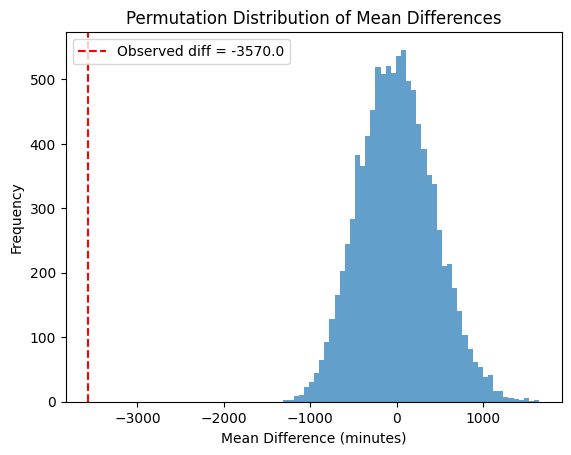

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Ensure df is cleaned (no missing durations or cause details)
df_clean = df.dropna(subset=["OUTAGE.DURATION", "CAUSE.CATEGORY.DETAIL"])

# 2. Split into the two groups
group_v = df_clean[df_clean["CAUSE.CATEGORY.DETAIL"] == "vandalism"]["OUTAGE.DURATION"].values
group_o = df_clean[df_clean["CAUSE.CATEGORY.DETAIL"] != "vandalism"]["OUTAGE.DURATION"].values

# 3. Compute the observed difference in means
obs_diff = group_v.mean() - group_o.mean()

# 4. Permutation sampling
all_durations = np.concatenate([group_v, group_o])
n_v = len(group_v)
n_perms = 10_000
perm_diffs = np.empty(n_perms)

for i in range(n_perms):
    permuted = np.random.permutation(all_durations)
    perm_v = permuted[:n_v]
    perm_o = permuted[n_v:]
    perm_diffs[i] = perm_v.mean() - perm_o.mean()

# 5. Calculate the two‐sided p‐value
p_value = np.mean(np.abs(perm_diffs) >= abs(obs_diff))
print(f"Observed mean difference: {obs_diff:.2f} minutes")
print(f"Permutation p-value: {p_value:.4f}")

# 6. Visualize the null distribution
plt.hist(perm_diffs, bins=50, alpha=0.7)
plt.axvline(obs_diff, color='red', linestyle='--',
            label=f'Observed diff = {obs_diff:.1f}')
plt.xlabel('Mean Difference (minutes)')
plt.ylabel('Frequency')
plt.title('Permutation Distribution of Mean Differences')
plt.legend()
plt.show()


## Step 5: Framing a Prediction Problem

Our model will try to predict the outage duration.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = ['YEAR', 'U.S._STATE', 'NERC.REGION', 'CAUSE.CATEGORY']
target = 'OUTAGE.DURATION'

# Drop rows with missing values in selected columns
df_model = df.dropna(subset=features + [target]).copy()

# Define categorical and numerical features
categorical_features = ['U.S._STATE', 'NERC.REGION', 'CAUSE.CATEGORY']
numerical_features = ['YEAR'] # Year can be treated numerically or categorically

# Create preprocessing pipelines for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into training and testing sets
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Example prediction for a new data point
new_data = pd.DataFrame({
    'YEAR': [2022],
    'U.S._STATE': ['California'],
    'NERC.REGION': ['WECC'],
    'CAUSE.CATEGORY': ['severe weather']
})

predicted_duration = model.predict(new_data)
print(f"\nPredicted outage duration for the new data point: {predicted_duration[0]:.2f} minutes")


Mean Squared Error (MSE): 52854983.19
Root Mean Squared Error (RMSE): 7270.14
R-squared (R2): 0.14

Predicted outage duration for the new data point: 986.24 minutes


In [ ]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Select the features and target for the new pipeline
features = ['ANOMALY.LEVEL', 'DEMAND.LOSS.MW', 'CLIMATE.CATEGORY']
target = 'OUTAGE.DURATION'

# Drop rows where the target is missing, but keep rows with missing features for imputation
df_pipe = df.dropna(subset=[target]).copy()

# Define categorical and numerical features for the new pipeline
numerical_features_pipe = ['ANOMALY.LEVEL', 'DEMAND.LOSS.MW']
categorical_features_pipe = ['CLIMATE.CATEGORY']

# Create preprocessing steps
# Numerical features: median imputation and standard scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features: constant imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different preprocessing to different columns
preprocessor_pipe = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_pipe),
        ('cat', categorical_transformer, categorical_features_pipe)
    ])

# Create the linear regression pipeline
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_pipe),
    ('regressor', LinearRegression())
])

# Split data into training and testing sets using the selected features
X_pipe = df_pipe[features]
y_pipe = df_pipe[target]

X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X_pipe, y_pipe, test_size=0.2, random_state=42)

# Train the pipeline
linear_regression_pipeline.fit(X_train_pipe, y_train_pipe)

# Make predictions
y_pred_pipe = linear_regression_pipeline.predict(X_test_pipe)

# Evaluate the pipeline
mse_pipe = mean_squared_error(y_test_pipe, y_pred_pipe)
rmse_pipe = np.sqrt(mse_pipe)
r2_pipe = r2_score(y_test_pipe, y_pred_pipe)

print("\nLinear Regression Pipeline Results:")
print(f"Mean Squared Error (MSE): {mse_pipe:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_pipe:.2f}")
print(f"R-squared (R2): {r2_pipe:.2f}")

# Example prediction using the new pipeline with potential missing values
new_data_pipe = pd.DataFrame({
    'ANOMALY.LEVEL': [0.5, np.nan],
    'DEMAND.LOSS.MW': [100, 50],
    'CLIMATE.CATEGORY': ['Hot Dry', 'missing']
})

predicted_duration_pipe = linear_regression_pipeline.predict(new_data_pipe)
print(f"\nPredicted outage durations for new data points using the pipeline: {predicted_duration_pipe}")


Linear Regression Pipeline Results:
Mean Squared Error (MSE): 61525895.25
Root Mean Squared Error (RMSE): 7843.84
R-squared (R2): -0.00

Predicted outage durations for new data points using the pipeline: [2536.24067783 2577.36519514]


## Step 6: Baseline Model

## Step 7: Final Model

In [ ]:
# TODO

## Step 8: Fairness Analysis

In [ ]:
# TODO